# Demonstration of `ocean-model-skill-assessor`: Alaska example

Here we demonstrate how to use `ocean-model-skill-assessor` as a Python package.

In [1]:
import xarray as xr
import ocean_data_gateway as odg
import cf_xarray
import pandas as pd
import extract_model as em
import ocean_model_skill_assessor as omsa
import numpy as np
from IPython import display
from glob import glob

## Definitions

These dictionaries are not required for every type of run, but are required for identifying variables in both datasets and models, and for running QC. They can be complicated if desired, but do not have to be. Once they are written they do not need to be modified much. More information about these dictionaries is available in the [`ocean_data_gateway` docs](https://ocean-data-gateway.readthedocs.io/en/latest/details.html#Configure-custom-criteria-and-variable-definitions). We posted online pre-populated definitions to make this easy.

Here are `criteria`, which map identifying features of different variables to a variable nickname we can generically refer to:

In [2]:
url = 'https://gist.githubusercontent.com/kthyng/c3cc27de6b4449e1776ce79215d5e732/raw/18f18f33ccc71144842bd9fbf87611f1f6f4a67e/my_custom_criteria.py'
criteria = odg.return_response(url)

Here are `var_def` which give some rules for QC for different variables (referring to the variables by the same nicknames as in `criteria`):

In [3]:
url = 'https://gist.githubusercontent.com/kthyng/b8056748a811479460b6d5fc5cb5537b/raw/6b531cc5d3072ff6a4f5174f882d7d91d880cbf8/my_var_def.py'
var_def = odg.return_response(url)

## Search for Data over a Region

This example demonstrates performing a search in time and space for data to compare with your model output. By default this would search in the spatial bounding box of the model output, but here we instead input a smaller bounding box so as to limit the number of datasets found and used. For several of the datasets, the model output isn't available (must be determined to be on land). 

CPU times: user 17.4 s, sys: 4.81 s, total: 22.2 s
Wall time: 2min 9s


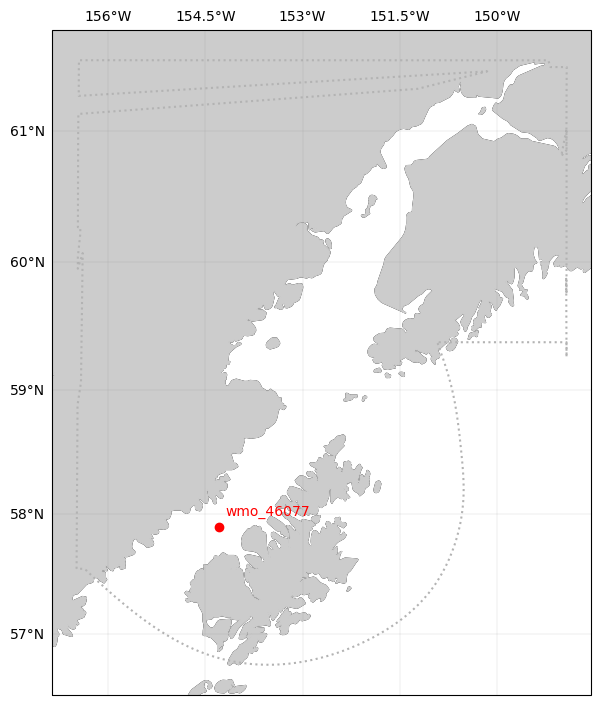

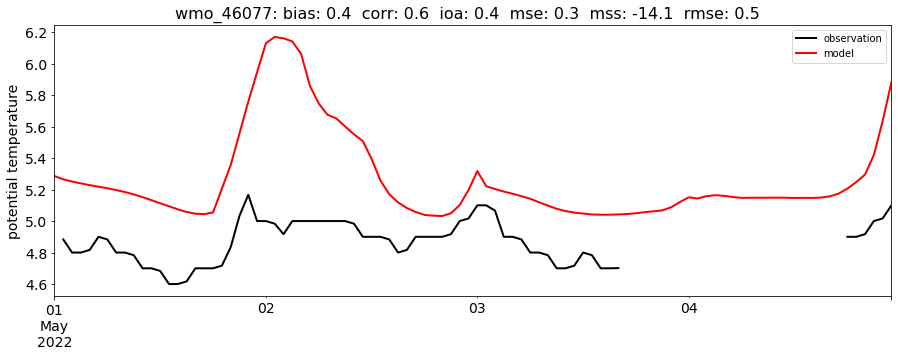

In [7]:
%%time

omsa.set_criteria(criteria)

# model_url = 'https://thredds.aoos.org/thredds/dodsC/NOAA_COOPS_OFS_CIOFS.nc'
model_url = 'https://www.ncei.noaa.gov/thredds/dodsC/model-ciofs-agg/Aggregated_CIOFS_Fields_Forecast_best.ncd'
bbox = [-154.7, 57.5, -153.7, 58.0]
search = omsa.run(
                  loc_model=model_url,
                  approach='region',
                  bbox=bbox,
                  criteria=criteria,
                  horizontal_interp=False,
                  var_def=var_def,
                  xarray_kwargs={'chunks': {'ocean_time': 1, 's_rho': 1},
                                 'drop_variables': ['ocean_time', 'time_run']},
                  time_range=['2022-5-1','2022-5-4'], 
                  variables=['temp'],
                  readers=[odg.erddap],
                  erddap={
                      'known_server': 'ioos'
                  },
)